In [ ]:
# Person 1 : Madeline Boss
# Person 2 : Samhitha Kunadharaju
# Date Last Editied: 9/21/2025

In [1]:
"""
The provided function "bins" your data and may produce a more readable graph than
what you may currently have. Feel free to use this code, and modify if needed.

How to use this code:

PARAMETERS
data -> data collected during project. More information below.
n_mu -> Number of distinct mu values you have tested.
resolution -> number of bins. Lower means less clear graph. (400 recommended)
mu_min -> Minimum mu value tested (should be 2.4)
mu_max -> Maximum mu value tested (should be 4.0)
x_min -> Minimum value of data point (default 0)
x_max -> Maximum value of data point (default 1)

OUTPUT
Returns nothing. Should display a graph.

NOTES
n_data -> Number of "data" iterations you have.
data -> A 2D numpy array of shape (n_mu, n_data). Each row represents a certain mu value. Each column represents the ith data iteration.
For example data[5][100] means the point found at the 100th data iteration for the 5th mu value you analyzed.

Please replace graph title and axis titles.
"""

import numpy as np
import matplotlib.pyplot as plt

def create_graph(data, n_mu, resolution = 400, mu_min = 2.4, mu_max = 4.0, x_min = 0, x_max = 1):

  # Warning if data is not formatted correctly
  if (len(data.shape) != 2) or (data.shape[0] != n_mu):
    print("data may be in wrong shape!")

  # Bin the data
  binned_grid = np.zeros((n_mu, resolution))
  for mu_ctr in range(n_mu):
    binned, _ = np.histogram(data[mu_ctr], bins = resolution, range = (0, 1))
    binned = binned.astype('float64')
    binned /= np.max(binned)
    binned_grid[mu_ctr] = binned
  binned_grid = np.transpose(binned_grid) #Had to transpose for correct orientation.

  # Create graph
  plt.figure(figsize=(10, 8))
  plt.imshow(binned_grid, origin = "lower", extent=[mu_min, mu_max, x_min, x_max], cmap='binary')
  plt.title("Fixed Point Values for mu*x(1-x)")
  plt.xlabel("Mu Values")
  plt.ylabel("Fixed Point Value(s)")
  plt.show()

In [2]:
"""
min_u: the lower part of the range
max_u: the upper part of the range
num_points: The number of mu values to get the estimations
x: starting point
resolution: number of iterations to keep
throwaway: number of iterations to throw away
"""
def get_data(min_u, max_u, num_points, x, resolution, throwaway):

  # Establish u values
  u_values = np.linspace(min_u, max_u, num_points)

  data = np.empty((0, resolution))  # 0 rows, 30 columns

  # Loop 1: Go through mu values
  for u in u_values:
      x_knot = x
      x_knots_values = []
      # Loop 2: Discard values
      for i in range(throwaway):
          x_knot = u * x_knot * (1.0 - x_knot)
      # Loop 3: Values to use in graph
      for i in range(resolution):
          x_knot = u * x_knot * (1.0 - x_knot)
          x_knots_values.append(x_knot)

      # Appended values
      x_knots_values = np.array(x_knots_values).reshape(1, -1)
      data = np.vstack([data, x_knots_values])

  return (data, data.shape[0])

print(get_data(2.4, 4, 17, 0.5, 400, 1000))


(array([[0.58333333, 0.58333333, 0.58333333, ..., 0.58333333, 0.58333333,
        0.58333333],
       [0.6       , 0.6       , 0.6       , ..., 0.6       , 0.6       ,
        0.6       ],
       [0.61538462, 0.61538462, 0.61538462, ..., 0.61538462, 0.61538462,
        0.61538462],
       ...,
       [0.5349671 , 0.94535375, 0.19630815, ..., 0.72964552, 0.74959915,
        0.71326101],
       [0.53567694, 0.97003591, 0.11335836, ..., 0.57062125, 0.95554929,
        0.16565188],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), 17)


/tmp/ipython-input-13602137.py:22: RuntimeWarning: overflow encountered in scalar multiply
  x_knot = u * x_knot * (1.0 - x_knot)
/tmp/ipython-input-516317861.py:41: RuntimeWarning: invalid value encountered in divide
  binned /= np.max(binned)


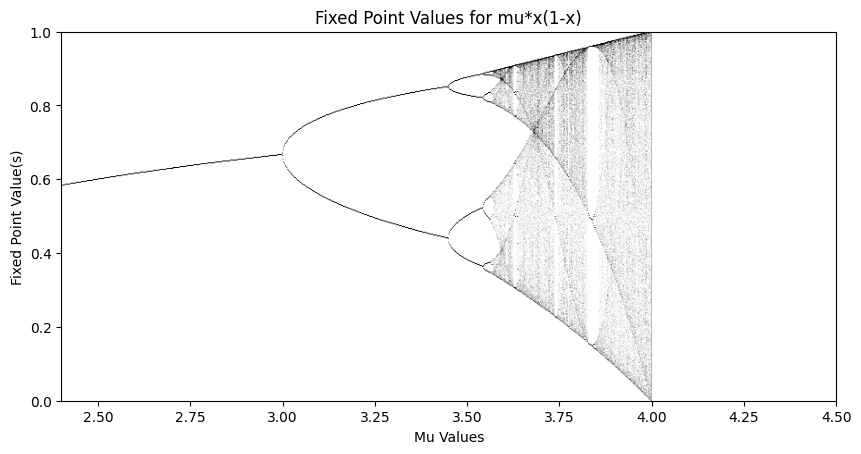

In [3]:
data = get_data(2.4, 4.5, 1000, 0.5, 400, 1000)
create_graph(data[0], data[1], mu_max = 4.5)